In [1]:
#Three Observable Trends:
# 1) The majority of drivers are in Urban cities, which also have the lowest fares. 
# 2) The % Total of Urban Fares is significantly lower than the % Total of Suburban and Rural Fares comparitively to their respective % of Total Rides.
#    The disparity can probably  be explained by rural fares being higher due to longer trip length.
# 3) Rural Drivers make up only .8% of the Total Drivers, yet account for 5.3% of the Total Rides. This may imply that Rural Drivers work longer hours.


%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls

# File to Load (Remember to change these)
city_data_to_load = "../MatplotlibHomework/city_data.csv"
ride_data_to_load = "../MatplotlibHomework/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combineddata = pd.merge(citydata,ridedata, on="city", how="outer")


# Display the data table for preview

combineddata.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

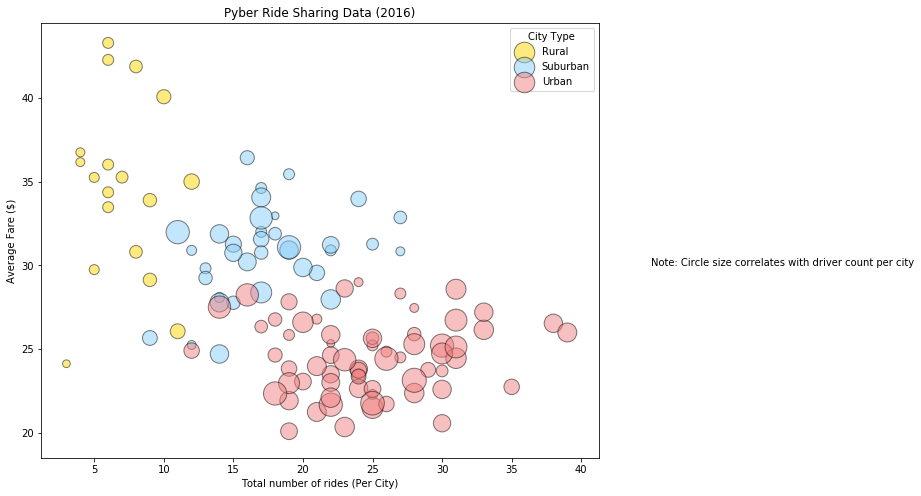

In [2]:
# Obtain the x and y coordinates for each of the three city types

PerCity = combineddata.groupby(["type"]+["city"]+["driver_count"])
FarePerCity = PerCity["fare"].mean()
RideCount = PerCity["ride_id"].count()
DriverCount = PerCity["driver_count"].count()
type = PerCity["type"].count()
# Build the scatter plots for each city types
fig, ax = plt.subplots(figsize=(10, 8))
colors = {'Rural':'gold', 'Suburban':'lightskyblue', 'Urban':'lightcoral'}
ax.scatter(RideCount["Rural"],FarePerCity["Rural"],s = DriverCount*20,c="gold",alpha = .5,edgecolor="black") 
ax.scatter(RideCount["Suburban"],FarePerCity["Suburban"],s = DriverCount*20,c="lightskyblue",alpha = .5,edgecolor="black") 
ax.scatter(RideCount["Urban"],FarePerCity["Urban"],s = DriverCount*20,c="lightcoral",alpha = .5,edgecolor="black") 
# Incorporate the other graph properties
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Create a legend
ax.legend(["Rural","Suburban","Urban"],title= 'City Type')
# Incorporate a text label regarding circle size
ax.text(45,30,'Note: Circle size correlates with driver count per city')
# Save Figure
plt.savefig('RideSharingData.png')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

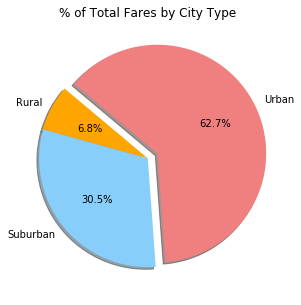

In [4]:
# Calculate Type Percents
PerCity2 = combineddata.groupby(["type"])
CityPercent = PerCity2["fare"].sum()/len(PerCity2["fare"])
type = ["Rural","Suburban","Urban"]
# Build Pie Chart
plt.figure(figsize=(9,5))
plt.pie(CityPercent,explode = (0,0,.1),colors = ("orange","lightskyblue","lightcoral"),labels=type,autopct="%1.1f%%",shadow=True,startangle = 140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('FaresByCityType.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

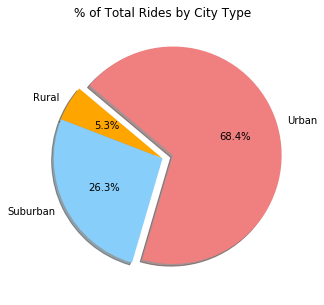

In [6]:
# Calculate Ride Percents
CityPercent2 = PerCity2["ride_id"].count()/len(PerCity2["ride_id"])
# Build Pie Chart
plt.figure(figsize=(9,5)) 
plt.pie(CityPercent2,explode = (0,0,.1),colors = ("orange","lightskyblue","lightcoral"),labels=type,autopct="%1.1f%%",shadow=True,startangle = 140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('RidesByCityType.png')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

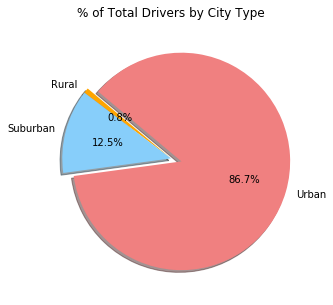

In [8]:
# Calculate Driver Percents
CityPercent3 = PerCity2["driver_count"].sum()/len(PerCity2["driver_count"])
# Build Pie Chart
plt.figure(figsize=(9,5))
plt.pie(CityPercent3,explode = (0,0,.1),colors = ("orange","lightskyblue","lightcoral"),labels=type,autopct="%1.1f%%",shadow=True,startangle = 140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('DriversByCityType.png')

In [9]:
# Show Figure
plt.show()